<a href="https://colab.research.google.com/github/DharaniMohanachandran22/neural_networks/blob/main/Dharani_RNN_using_TensorFlow_Keras_Custom_Dataset_Good_Happy_Bad_Sad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train=pd.read_csv("https://raw.githubusercontent.com/soaicbe/ml/master/spam.csv")
train

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
from sklearn.model_selection import train_test_split
X=train['Message']
y=train['Category']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
X_train=X_train.to_list()
y_train=y_train.to_list()
X_test=X_test.to_list()
y_test=y_test.to_list()

In [ ]:
X_train

In [ ]:
for i in range (len(y_train)):
  if y_train[i]=='spam':
    y_train[i]=0
  else:
    y_train[i]=1

In [ ]:
y_train

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input

model = Sequential()
model.add(Input(shape=(1,), dtype="string"))

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

max_tokens = 2000
max_len = 5
vectorize_layer = TextVectorization(
  # Max vocab size. Any words outside of the max_tokens most common ones
  # will be treated the same way: as "out of vocabulary" (OOV) tokens.
  max_tokens=max_tokens,
  # Output integer indices, one per string token
  output_mode="int",
  # Always pad or truncate to exactly this many tokens
  output_sequence_length=max_len,
)

In [ ]:
vectorize_layer.adapt(X_train)

In [ ]:
reverse_word_index = vectorize_layer.get_vocabulary()
reverse_word_index

In [ ]:
vectorize_layer.get_weights()

[array([b'to', b'i', b'you', ..., b'instructions', b'instantly',
        b'infowww100percentrealcom'], dtype=object)]

In [ ]:
model.add(vectorize_layer)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 5)                 0         
 ctorization)                                                    
                                                                 
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.layers import Embedding
model.add(Embedding(max_tokens + 1, 8))

In [ ]:
from tensorflow.keras.layers import LSTM, SimpleRNN
model.add(LSTM(16))

In [ ]:
from tensorflow.keras.layers import Dense

model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 5)                 0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 5, 8)              16008     
                                                                 
 lstm (LSTM)                 (None, 16)                1600      
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 17897 (69.91 KB)
Trainable params: 17897 (69.91 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [ ]:
model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
  history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
122/122 [==============================] - 3s 4ms/step - loss: 0.4397 - accuracy: 0.8662
Epoch 2/5
122/122 [==============================] - 0s 4ms/step - loss: 0.2057 - accuracy: 0.9087
Epoch 3/5
122/122 [==============================] - 0s 4ms/step - loss: 0.1187 - accuracy: 0.9626
Epoch 4/5
122/122 [==============================] - 1s 4ms/step - loss: 0.0855 - accuracy: 0.9710
Epoch 5/5
122/122 [==============================] - 0s 4ms/step - loss: 0.0684 - accuracy: 0.9772


In [ ]:
import matplotlib.pylab as plt

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

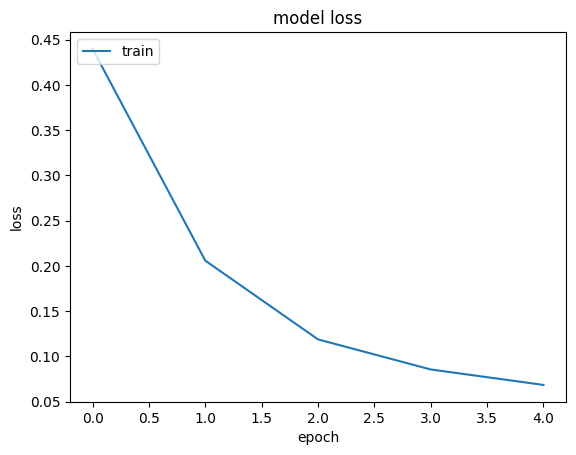

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print(model.predict([
  "Night night, see you tomorrow",
]))

1/1 [==============================] - 0s 493ms/step
[[0.99991137]]


In [ ]:
e = model.layers[1]
weights = e.get_weights()[0]
print(weights.shape)

(2001, 8)


In [ ]:
model2 = Sequential()
model2.add(Input(shape=(1,), dtype="string"))
model2.add(vectorize_layer)
model2.add(Embedding(max_tokens + 1, 2))
model2.add(SimpleRNN(16, return_sequences=True))
model2.add(SimpleRNN(16))
model2.add(Dense(16, activation="relu"))
model2.add(Dense(1, activation="sigmoid"))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 5)                 0         
 ctorization)                                                    
                                                                 
 embedding_1 (Embedding)     (None, 5, 2)              4002      
                                                                 
 simple_rnn (SimpleRNN)      (None, 5, 16)             304       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                      

In [ ]:
e = model2.layers[1]
weights = e.get_weights()[0]
print(weights.shape)

(2001, 2)


In [ ]:
import io

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, max_tokens):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np

In [ ]:
words = np.loadtxt('meta.tsv', skiprows=1, dtype=str)
words

array(['to', 'i', 'you', ..., 'instructions', 'instantly',
       'infowww100percentrealcom'], dtype='<U27')

In [ ]:
vectors = np.loadtxt('vecs.tsv', skiprows=1)
vectors

array([[ 0.03797287, -0.03538581],
       [-0.02407294, -0.00163019],
       [ 0.00736396, -0.00839981],
       ...,
       [ 0.00240017,  0.01734905],
       [-0.04113857, -0.04358588],
       [-0.04537221, -0.01493665]])

In [ ]:
import plotly.express as px

fig = px.scatter(x=vectors[:,0], y=vectors[:,1], labels={'x':'x', 'y':'y'}, hover_name=words)
fig.show()